In [163]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [164]:
images.shape

(2, 427, 640, 3)

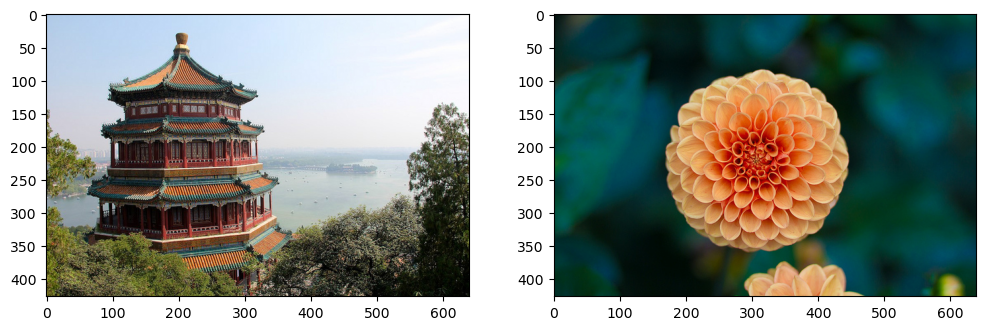

In [196]:
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(images[0, :, :, :])
ax[1].imshow(images[1, :, :, :])
plt.show()

In [197]:
batch_size, height, width, channels = images.shape
print(f"batch size = {batch_size}")
print(f"height = {height}")
print(f"width = {width}")
print(f"channels = {channels}")

batch size = 2
height = 427
width = 640
channels = 3


In [198]:
filters = np.zeros(shape=(3, 3, channels, 2), dtype=np.float32)

for channel in range(channels):
    filters[:, 1, channel, 0] = np.array([-0.5, 0, 0.5])
    filters[1, :, channel, 1] = np.array([-0.5, 0, 0.5])

In [199]:
filters[:,:,:,0]

array([[[ 0. ,  0. ,  0. ],
        [-0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5],
        [ 0. ,  0. ,  0. ]]], dtype=float32)

In [200]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [201]:
outputs.shape

TensorShape([2, 427, 640, 2])

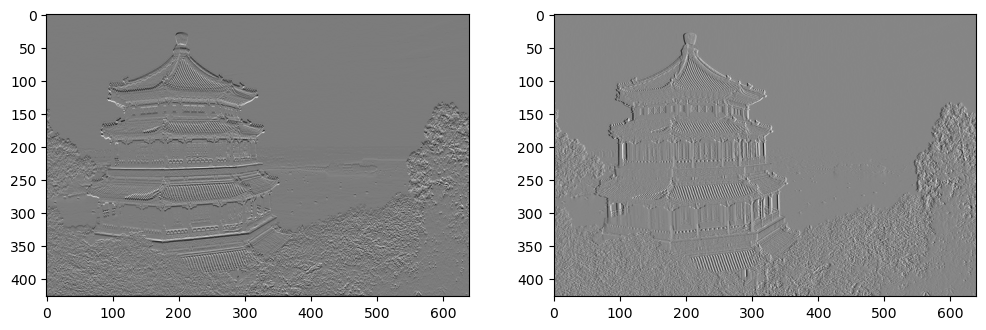

In [202]:
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(outputs[0, :, :, 0], cmap="gray")
ax[1].imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

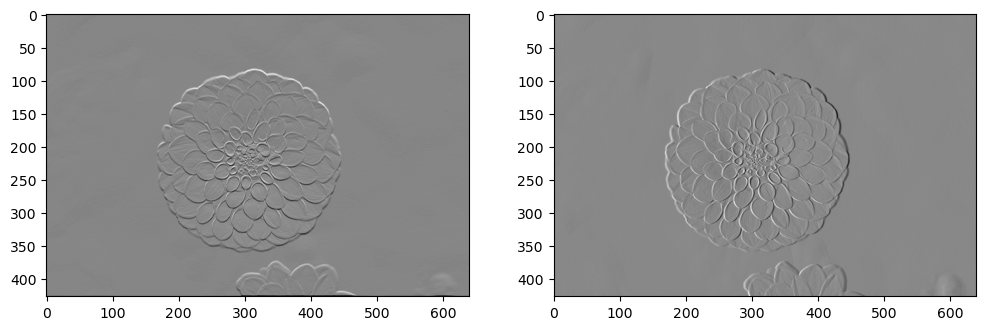

In [203]:
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(outputs[1, :, :, 0], cmap="gray")
ax[1].imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

In [204]:
res = [np.sqrt(np.square(outputs[0, :, :, 0]) + np.square(outputs[0, :, :, 1])),
       np.sqrt(np.square(outputs[1, :, :, 0]) + np.square(outputs[1, :, :, 1]))]

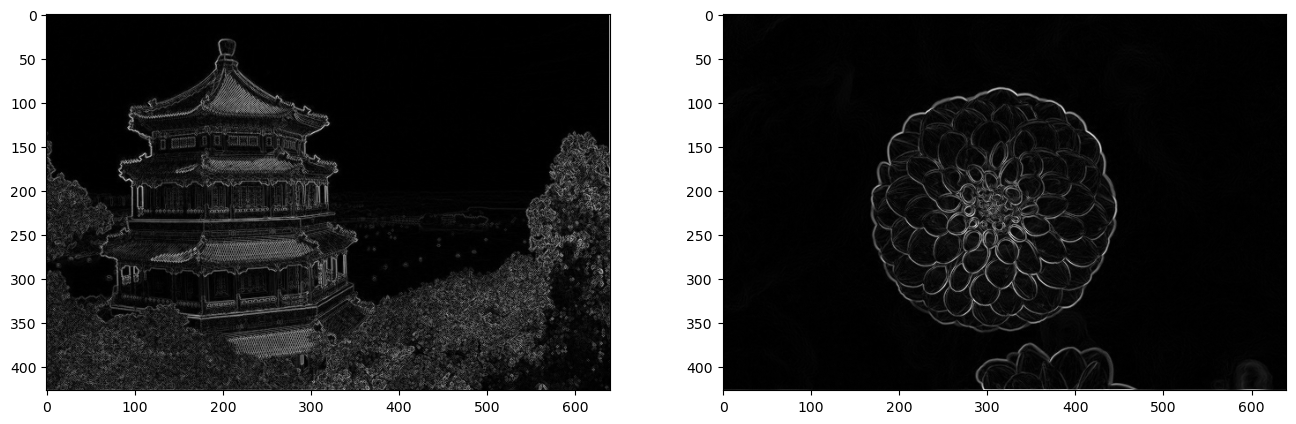

In [205]:
_, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(res[0], cmap="gray")
ax[1].imshow(res[1], cmap="gray")
plt.show()